### Total load

The dataset *TERNA_SUNSET_TOTAL_LOAD_QH* deals with the trend of the total demand in the Italian electrical system. The 'forecast' data is produced the day before the reference day based on our best prediction, taking into account all the variables that can influence the demand for electricity: from meteorological and climatic factors to socioeconomic components.

In [24]:
import sys
import os
import pandas as pd

# Add the source directory to the system path
sys.path.append(os.path.abspath('../../src'))
from open_data import fetch_db_table_sqlserver16
import utils
import importlib

# Reload the module
importlib.reload(utils)

# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_TOTAL_LOAD_QH" 
total_load = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
total_load = total_load.sort_values(by='ORAINI')

total_load

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,ZONA,ORAINI,FLOWDATE,FLOWHOUR,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW,LOADTIME
550463,Italy,201901010000,20190101,1,24370.000,25009.000,2024-10-17 12:45:36.933
1171103,SICI,201901010000,20190101,1,1876.794,1926.005,2024-10-17 12:45:36.933
964223,SARD,201901010000,20190101,1,942.891,967.615,2024-10-17 12:45:36.933
343583,CSUD,201901010000,20190101,1,4292.272,4404.819,2024-10-17 12:45:36.933
136703,CNOR,201901010000,20190101,1,2660.928,2730.699,2024-10-17 12:45:36.933
...,...,...,...,...,...,...,...
1377982,SICI,202411262345,20241126,24,1773.455,1813.597,2024-11-27 06:00:16.447
964222,NORD,202411262345,20241126,24,18070.630,18479.659,2024-11-27 06:00:16.447
136702,CALA,202411262345,20241126,24,547.661,560.057,2024-11-27 06:00:16.447
1171102,SARD,202411262345,20241126,24,792.786,810.730,2024-11-27 06:00:16.447


In [25]:
# Filter the DataFrame for the relevant columns and rows
total_load = total_load[['ZONA', 'TOTAL_LOAD_MW', 'FORECAST_TOTAL_LOAD_MW', 'ORAINI']]
# Convert ORAINI to datetime using the correct method
total_load['ORAINI'] = pd.to_datetime(total_load['ORAINI'], format='%Y%m%d%H%M')
total_load.set_index('ORAINI', inplace=True)

total_load.head(8)

C:\Users\samueledelia\AppData\Local\Temp\2\ipykernel_5108\2034356136.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_load['ORAINI'] = pd.to_datetime(total_load['ORAINI'], format='%Y%m%d%H%M')


,ZONA,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
ORAINI,,,
2019-01-01 00:00:00,Italy,24370.000,25009.000
2019-01-01 00:00:00,SICI,1876.794,1926.005
2019-01-01 00:00:00,SARD,942.891,967.615
2019-01-01 00:00:00,CSUD,4292.272,4404.819
2019-01-01 00:00:00,CNOR,2660.928,2730.699
2019-01-01 00:00:00,SUD,2820.710,2894.671
2019-01-01 00:00:00,NORD,11776.405,12085.191
2019-01-01 00:15:00,SICI,1887.632,1933.805


In [26]:
total_load.tail(8)

,ZONA,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
ORAINI,,,
2024-11-26 23:45:00,CSUD,5594.204,5720.829
2024-11-26 23:45:00,ITALY,31544.001,32257.999
2024-11-26 23:45:00,CNOR,2518.219,2575.219
2024-11-26 23:45:00,SICI,1773.455,1813.597
2024-11-26 23:45:00,NORD,18070.630,18479.659
2024-11-26 23:45:00,CALA,547.661,560.057
2024-11-26 23:45:00,SARD,792.786,810.730
2024-11-26 23:45:00,SUD,2247.046,2297.908


In [27]:
subset_zonas = ['NORD']
mnord_load = utils.filter_load_by_zona(total_load, subset_zonas)
mnord_load = mnord_load.drop(columns=['ZONA'])
mnord_load

,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
ORAINI,,
2019-01-01 00:00:00,11776.405,12085.191
2019-01-01 00:15:00,11723.369,12010.132
2019-01-01 00:30:00,11771.133,11984.692
2019-01-01 00:45:00,11740.606,11935.066
2019-01-01 01:00:00,11559.374,11825.838
...,...,...
2024-11-26 22:45:00,19808.974,20099.417
2024-11-26 23:00:00,19370.610,19636.046
2024-11-26 23:15:00,18950.276,19145.791


In [28]:
subset_zonas = ['CNORD', 'CSUD', 'SUD', 'SICI', 'SARD', 'CALA']
msud_load = utils.filter_load_by_zona(total_load, subset_zonas)

# Group by datetime and sum TOTAL_LOAD_MW and FORECAST_TOTAL_LOAD_MW
msud_load = msud_load.groupby(msud_load.index).agg(
    TOTAL_LOAD_MW=('TOTAL_LOAD_MW', 'sum'),
    FORECAST_TOTAL_LOAD_MW=('FORECAST_TOTAL_LOAD_MW', 'sum')
).reset_index()

msud_load

,ORAINI,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
0,2019-01-01 00:00:00,9932.667,10193.110
1,2019-01-01 00:15:00,9788.694,10028.134
2,2019-01-01 00:30:00,9709.883,9886.046
3,2019-01-01 00:45:00,9610.960,9770.148
4,2019-01-01 01:00:00,9472.551,9690.910
...,...,...,...
206875,2024-11-26 22:45:00,12359.664,12540.884
206876,2024-11-26 23:00:00,12052.769,12217.931
206877,2024-11-26 23:15:00,11823.420,11945.406
206878,2024-11-26 23:30:00,11221.569,11431.127


In [29]:
subset_zonas = ['ITALY', 'Italy']
italy_load = utils.filter_load_by_zona(total_load, subset_zonas)
italy_load = italy_load.drop(columns=['ZONA'])
italy_load

,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
ORAINI,,
2019-01-01 00:00:00,24370.000,25009.000
2019-01-01 00:15:00,24202.000,24794.001
2019-01-01 00:30:00,24142.000,24580.000
2019-01-01 00:45:00,23969.000,24366.001
2019-01-01 01:00:00,23599.001,24143.000
...,...,...
2024-11-26 22:45:00,34987.998,35500.999
2024-11-26 23:00:00,34152.999,34621.002
2024-11-26 23:15:00,33439.000,33784.000


### Italian total load

I will focus exclusively on the Italian case, where the macrozones Nord and Sud are expected to exhibit similar patterns.

In [30]:
print("Macro-scale descriptive stats: ITALY")
print(italy_load["TOTAL_LOAD_MW"].describe(),"\n")

Macro-scale descriptive stats: ITALY
count    206880.000000
mean      35631.397443
std        8351.316559
min       17164.000000
25%       28501.000000
50%       34932.000000
75%       42690.000000
max       59902.001000
Name: TOTAL_LOAD_MW, dtype: float64 



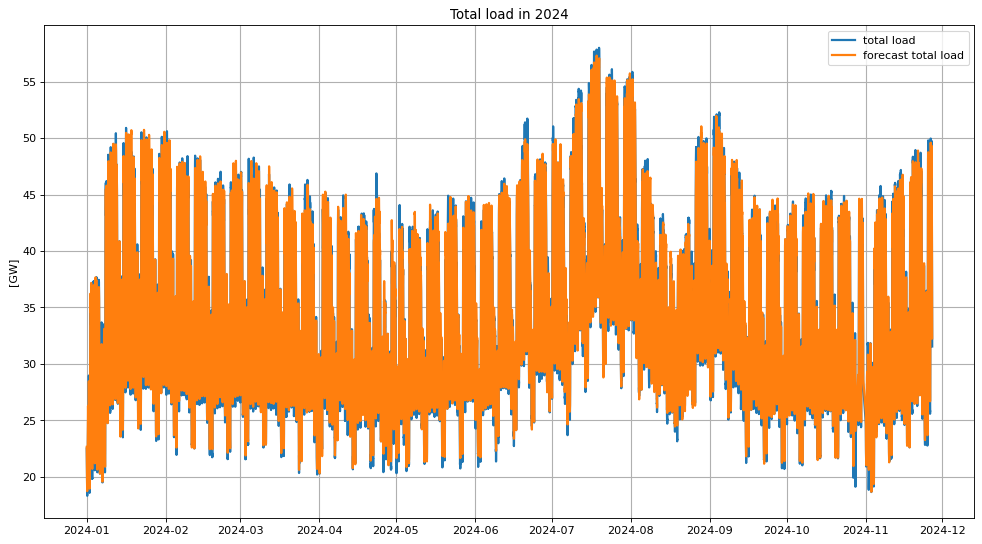

In [31]:
import matplotlib.pyplot as plt

DPI = 80
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(italy_load["TOTAL_LOAD_MW"].loc["2024"]/1000, linewidth=2, label = "total load")
ax.plot(italy_load["FORECAST_TOTAL_LOAD_MW"].loc["2024"]/1000, linewidth=2, label = "forecast total load")
ax.legend(loc='upper right')
ax.set_title("Total load in 2024"); ax.set_ylabel("[GW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

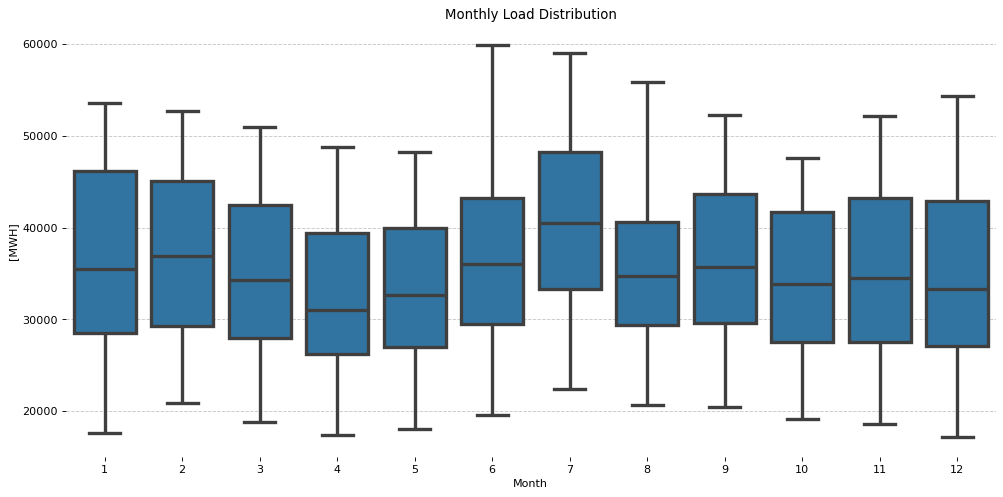

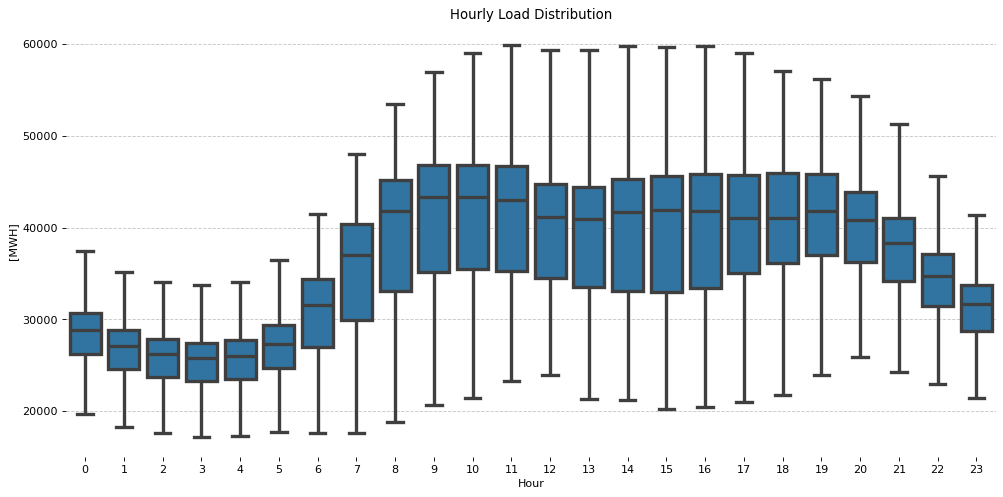

In [32]:
import seaborn as sns

italy_load_copy = italy_load.copy()
italy_load_copy.loc[:, 'hour'] = italy_load_copy.index.hour
italy_load_copy.loc[:, 'month'] = italy_load_copy.index.month

fig, ax = plt.subplots(figsize=(15, 7), dpi=DPI)
sns.boxplot(data=italy_load_copy, x='month', y='TOTAL_LOAD_MW', fliersize=0, linewidth=3, ax=ax)
ax.set_xlabel("Month"); ax.set_ylabel("[MWH]")
ax.set_title("Monthly Load Distribution")
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

fig, ax = plt.subplots(figsize=(15, 7), dpi=DPI)
sns.boxplot(data=italy_load_copy, x='hour', y='TOTAL_LOAD_MW', fliersize=0, linewidth=3, ax=ax)
ax.set_xlabel("Hour"); ax.set_ylabel("[MWH]")
ax.set_title("Hourly Load Distribution")
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

Trends in load

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

# Let's check error metrics for load forecasts:
total_mae = mean_absolute_error(italy_load.loc["2024"].dropna()["TOTAL_LOAD_MW"], italy_load.loc["2024"].dropna()["FORECAST_TOTAL_LOAD_MW"])
total_rmse = root_mean_squared_error(italy_load.loc["2024"].dropna()["TOTAL_LOAD_MW"], italy_load.loc["2024"].dropna()["FORECAST_TOTAL_LOAD_MW"])

print(f"Total MAE: {total_mae:.2f}MW | Total RMSE: {total_rmse:.2f}MW")

Total MAE: 647.40MW | Total RMSE: 865.91MW


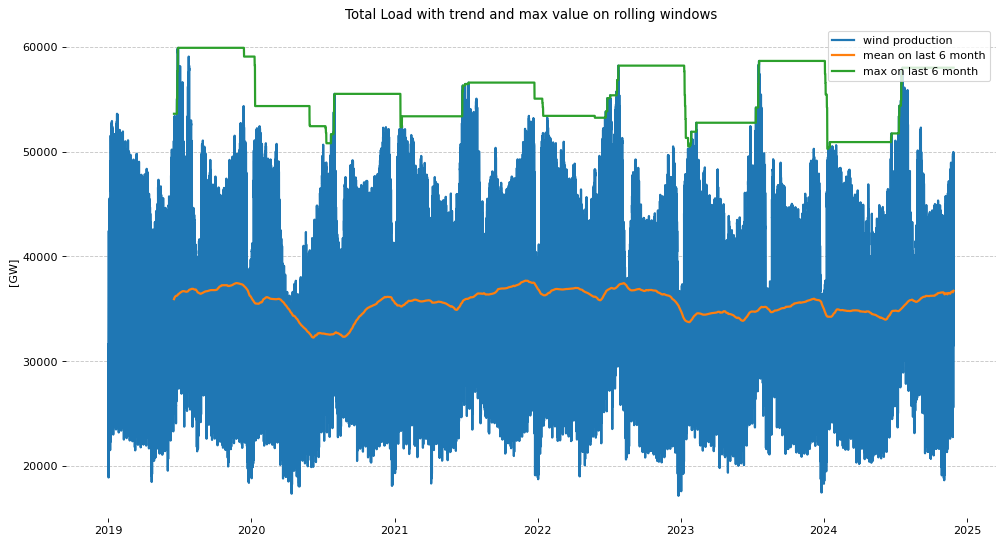

In [34]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(italy_load["TOTAL_LOAD_MW"], linewidth=2, label = 'wind production') 
ax.plot(italy_load["TOTAL_LOAD_MW"].rolling(4*24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(italy_load["TOTAL_LOAD_MW"].rolling(4*24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Total Load with trend and max value on rolling windows"); ax.set_ylabel("[GW]")
ax.legend(loc='upper right')
plt.show()

# Entsoe Total Load - Day Ahead / Actual

In [35]:
import sys
import os
import pandas as pd

# Add the source directory to the system path
sys.path.append(os.path.abspath('../../src'))
from open_data import fetch_db_table_sqlserver16
import utils
import importlib

# Reload the module
importlib.reload(utils)

# SQL query to fetch data
sql_query = "SELECT * FROM ENTSOE_DATA" 
entsoe_data = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
entsoe_data = entsoe_data.sort_values(by='ORAINI')

entsoe_data

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,UTC,ORAINI,FLOWDATE,FLOWHOUR,CODZONA,MACROZONA,DOMAIN,SCOPE,ENERGY_TYPE,VALUE,UNIT,BUSINESS_TYPE,LOADTIME
0,2018-12-31T23:00,201901010000,20190101,1,CNOR,SUD,GENERATION,ACTUAL,Biomass,10.0,MW,PRODUCTION,2019-02-20 13:47:34.400
93,2018-12-31T23:00,201901010000,20190101,1,SICI,SUD,GENERATION,ACTUAL,Fossil Coal-derived gas,180.0,MW,PRODUCTION,2019-02-20 13:47:34.400
92,2018-12-31T23:00,201901010000,20190101,1,SICI,SUD,GENERATION,ACTUAL,Biomass,16.0,MW,PRODUCTION,2019-02-20 13:47:34.400
91,2018-12-31T23:00,201901010000,20190101,1,SARD,SUD,LOAD,DAY AHEAD,NA,938.0,MW,CONSUMPTION,2019-02-20 13:47:30.477
90,2018-12-31T23:00,201901010000,20190101,1,SARD,SUD,LOAD,ACTUAL,NA,914.0,MW,CONSUMPTION,2019-02-20 13:47:30.477
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5423455,2024-11-28T22:00,202411282300,20241128,24,CSUD,SUD,LOAD,DAY AHEAD,NA,5320.0,MW,CONSUMPTION,2024-11-27 06:03:09.233
5423456,2024-11-28T22:00,202411282300,20241128,24,ITALY,ITALY,LOAD,DAY AHEAD,NA,30164.0,MW,CONSUMPTION,2024-11-27 06:18:09.373
5423457,2024-11-28T22:00,202411282300,20241128,24,NORD,NORD,LOAD,DAY AHEAD,NA,17120.0,MW,CONSUMPTION,2024-11-27 06:03:09.233
5423458,2024-11-28T22:00,202411282300,20241128,24,SARD,SUD,LOAD,DAY AHEAD,NA,855.0,MW,CONSUMPTION,2024-11-27 06:03:09.233


In [36]:
entsoe_data = entsoe_data[entsoe_data['DOMAIN'] == 'LOAD']
entsoe_data = entsoe_data.drop(columns=['DOMAIN'])
# Convert ORAINI to datetime using the correct method
entsoe_data['ORAINI'] = pd.to_datetime(entsoe_data['ORAINI'], format='%Y%m%d%H%M')
entsoe_data.set_index('ORAINI', inplace=True)

day_ahead_load = entsoe_data[entsoe_data['SCOPE'] == 'DAY AHEAD']
day_ahead_load = day_ahead_load[['CODZONA', 'VALUE']]
day_ahead_load["FORECAST_TOTAL_LOAD_MW"] = day_ahead_load["VALUE"]
day_ahead_load = day_ahead_load.drop(columns="VALUE")

day_ahead_load

,CODZONA,FORECAST_TOTAL_LOAD_MW
ORAINI,,
2019-01-01 00:00:00,SARD,938.0
2019-01-01 00:00:00,NORD,11110.0
2019-01-01 00:00:00,SUD,2560.0
2019-01-01 00:00:00,SICI,1836.0
2019-01-01 00:00:00,CNOR,2454.0
...,...,...
2024-11-28 23:00:00,CSUD,5320.0
2024-11-28 23:00:00,ITALY,30164.0
2024-11-28 23:00:00,NORD,17120.0


In [37]:
actual_load = entsoe_data[entsoe_data['SCOPE'] == 'ACTUAL']
actual_load = actual_load[['CODZONA', 'VALUE']]
actual_load["TOTAL_LOAD_MW"] = actual_load["VALUE"]
actual_load = actual_load.drop(columns="VALUE")

actual_load

,CODZONA,TOTAL_LOAD_MW
ORAINI,,
2019-01-01 00:00:00,SARD,914.0
2019-01-01 00:00:00,NORD,11511.0
2019-01-01 00:00:00,SUD,2563.0
2019-01-01 00:00:00,SICI,1884.0
2019-01-01 00:00:00,CNOR,2526.0
...,...,...
2024-11-27 08:00:00,SUD,2230.0
2024-11-27 08:00:00,SICI,1868.0
2024-11-27 08:00:00,CNOR,3608.0


In [38]:
entsoe_load = pd.merge(day_ahead_load, actual_load, on=['ORAINI', 'CODZONA'])

entsoe_load


,CODZONA,FORECAST_TOTAL_LOAD_MW,TOTAL_LOAD_MW
ORAINI,,,
2019-01-01 00:00:00,SARD,938.0,914.0
2019-01-01 00:00:00,NORD,11110.0,11511.0
2019-01-01 00:00:00,SUD,2560.0,2563.0
2019-01-01 00:00:00,SICI,1836.0,1884.0
2019-01-01 00:00:00,CNOR,2454.0,2526.0
...,...,...,...
2024-11-27 08:00:00,SUD,2454.0,2230.0
2024-11-27 08:00:00,SICI,2082.0,1868.0
2024-11-27 08:00:00,CNOR,3721.0,3608.0


In [39]:
subset_zonas = ['NORD']
mnord_load = entsoe_load[entsoe_load['CODZONA'].isin(subset_zonas)]
mnord_load = mnord_load.drop(columns=['CODZONA'])
mnord_load

,FORECAST_TOTAL_LOAD_MW,TOTAL_LOAD_MW
ORAINI,,
2019-01-01 00:00:00,11110.0,11511.0
2019-01-01 01:00:00,10675.0,11039.0
2019-01-01 02:00:00,10080.0,10430.0
2019-01-01 03:00:00,9793.0,9811.0
2019-01-01 04:00:00,9485.0,9474.0
...,...,...
2024-11-27 04:00:00,14510.0,14268.0
2024-11-27 05:00:00,15826.0,15747.0
2024-11-27 06:00:00,19528.0,19540.0


In [40]:
subset_zonas = ['CNORD', 'CSUD', 'SUD', 'SICI', 'SARD', 'CALA']
msud_load = entsoe_load[entsoe_load['CODZONA'].isin(subset_zonas)]
msud_load = msud_load.drop(columns=['CODZONA'])
msud_load

# Group by datetime and sum TOTAL_LOAD_MW and FORECAST_TOTAL_LOAD_MW
msud_load = msud_load.groupby(msud_load.index).agg(
    TOTAL_LOAD_MW=('TOTAL_LOAD_MW', 'sum'),
    FORECAST_TOTAL_LOAD_MW=('FORECAST_TOTAL_LOAD_MW', 'sum')
).reset_index()

msud_load

,ORAINI,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
0,2019-01-01 00:00:00,9607.0,9502.0
1,2019-01-01 01:00:00,9384.0,9110.0
2,2019-01-01 02:00:00,8804.0,8574.0
3,2019-01-01 03:00:00,8188.0,7997.0
4,2019-01-01 04:00:00,7790.0,7798.0
...,...,...,...
42052,2024-11-27 04:00:00,7766.0,7728.0
42053,2024-11-27 05:00:00,8646.0,8278.0
42054,2024-11-27 06:00:00,10152.0,9714.0
42055,2024-11-27 07:00:00,11566.0,11342.0


In [41]:
subset_zonas = ['ITALY', 'Italy']
italy_load = entsoe_load[entsoe_load['CODZONA'].isin(subset_zonas)]
italy_load = italy_load.drop(columns=['CODZONA'])
italy_load

,FORECAST_TOTAL_LOAD_MW,TOTAL_LOAD_MW
ORAINI,,
2019-01-01 00:00:00,23066.0,23644.0
2019-01-01 01:00:00,22159.0,22850.0
2019-01-01 02:00:00,20935.0,21600.0
2019-01-01 03:00:00,19927.0,20255.0
2019-01-01 04:00:00,19302.0,19459.0
...,...,...
2024-11-27 04:00:00,24742.0,24555.0
2024-11-27 05:00:00,26760.0,27206.0
2024-11-27 06:00:00,32472.0,33080.0


<h2> Italian total load </h2>

In [42]:
print("Macro-scale descriptive stats: ITALY")
print(italy_load["TOTAL_LOAD_MW"].describe(),"\n")

Macro-scale descriptive stats: ITALY
count    41922.000000
mean     32507.561925
std       7433.668724
min        358.000000
25%      26193.000000
50%      32006.500000
75%      38642.000000
max      53950.000000
Name: TOTAL_LOAD_MW, dtype: float64 



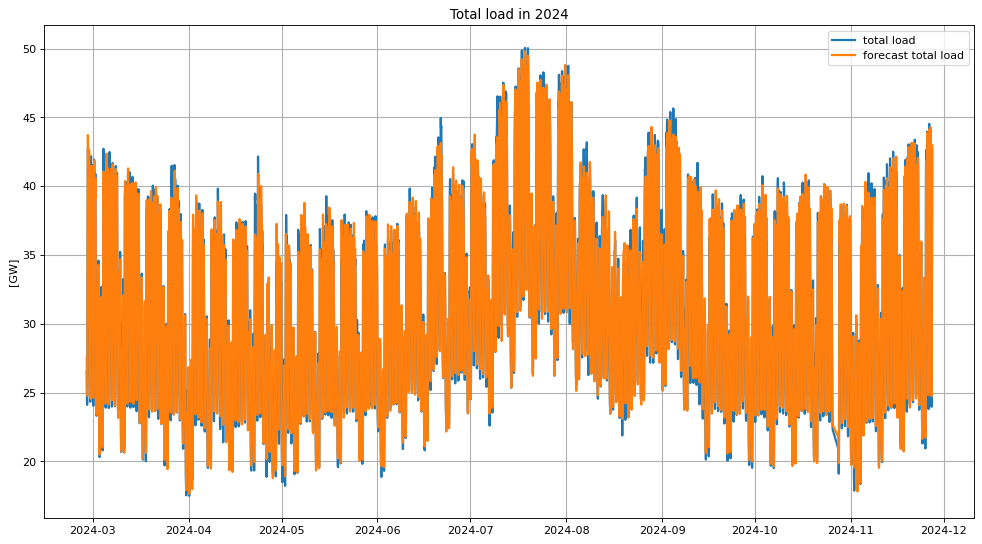

In [43]:
import matplotlib.pyplot as plt

DPI = 80
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(italy_load["TOTAL_LOAD_MW"].loc["2024"]/1000, linewidth=2, label = "total load")
ax.plot(italy_load["FORECAST_TOTAL_LOAD_MW"].loc["2024"]/1000, linewidth=2, label = "forecast total load")
ax.legend(loc='upper right')
ax.set_title("Total load in 2024"); ax.set_ylabel("[GW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

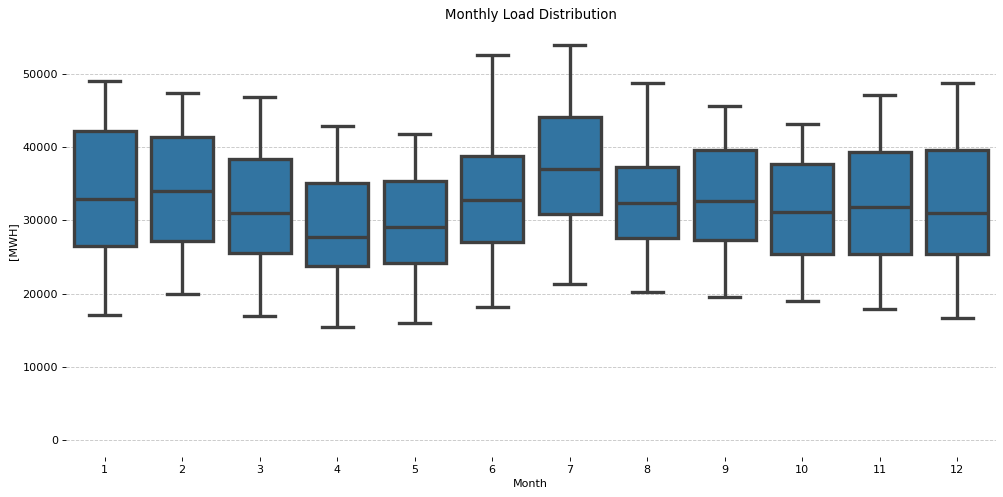

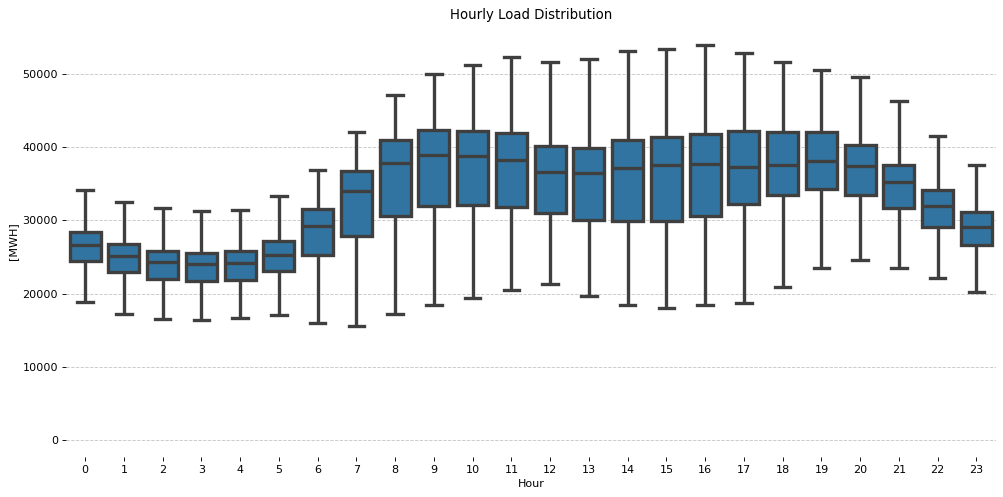

In [44]:
import seaborn as sns

italy_load_copy = italy_load.copy()
italy_load_copy.loc[:, 'hour'] = italy_load_copy.index.hour
italy_load_copy.loc[:, 'month'] = italy_load_copy.index.month

fig, ax = plt.subplots(figsize=(15, 7), dpi=DPI)
sns.boxplot(data=italy_load_copy, x='month', y='TOTAL_LOAD_MW', fliersize=0, linewidth=3, ax=ax)
ax.set_xlabel("Month"); ax.set_ylabel("[MWH]")
ax.set_title("Monthly Load Distribution")
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

fig, ax = plt.subplots(figsize=(15, 7), dpi=DPI)
sns.boxplot(data=italy_load_copy, x='hour', y='TOTAL_LOAD_MW', fliersize=0, linewidth=3, ax=ax)
ax.set_xlabel("Hour"); ax.set_ylabel("[MWH]")
ax.set_title("Hourly Load Distribution")
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

# Let's check error metrics for load forecasts:
total_mae = mean_absolute_error(italy_load.loc["2024"].dropna()["TOTAL_LOAD_MW"], italy_load.loc["2024"].dropna()["FORECAST_TOTAL_LOAD_MW"])
total_rmse = root_mean_squared_error(italy_load.loc["2024"].dropna()["TOTAL_LOAD_MW"], italy_load.loc["2024"].dropna()["FORECAST_TOTAL_LOAD_MW"])

print(f"Total MAE: {total_mae:.2f}MW | Total RMSE: {total_rmse:.2f}MW")

Total MAE: 592.75MW | Total RMSE: 810.16MW


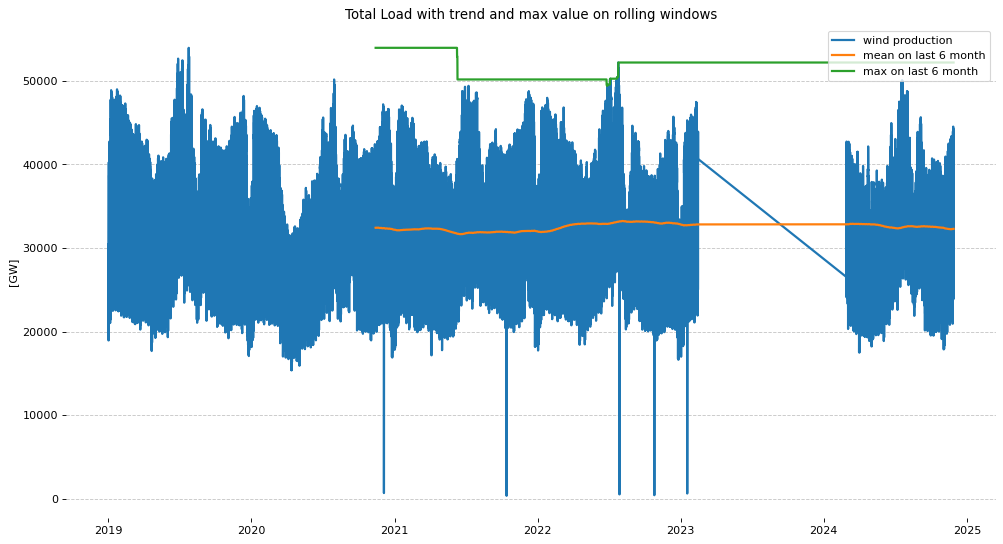

In [46]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(italy_load["TOTAL_LOAD_MW"], linewidth=2, label = 'wind production') 
ax.plot(italy_load["TOTAL_LOAD_MW"].rolling(4*24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(italy_load["TOTAL_LOAD_MW"].rolling(4*24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Total Load with trend and max value on rolling windows"); ax.set_ylabel("[GW]")
ax.legend(loc='upper right')
plt.show()